In [1]:
!pip install mysql-connector-python

In [2]:
import pandas as pd
import matplotlib.pyplot as plyt
import seaborn as sns

In [3]:
import mysql.connector

con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')

In [4]:
imdb_title_crew_df = pd.read_sql_query("""
SELECT * 
FROM movies.imdb_title_crew;
""",con)

In [5]:
imdb_title = pd.read_sql_query("""
SELECT * 
FROM movies.imdb_title_basics;
""",con)

In [6]:
imdb_people = pd.read_sql_query("""
SELECT * 
FROM movies.imdb_name_basics;
""",con)

In [7]:
imdb_ratings = pd.read_sql_query("""
SELECT 
	tconst,
    averagerating,
    numvotes
FROM movies.imdb_title_ratings
""",con)

## Execution

In [8]:
imdb_test = imdb_title_crew_df['directors'].str.split(pat=',',expand=True)

In [9]:
imdb_test.iloc[ : ,1].isna().sum() #Out of 146144 movies, 130417 have only 1 director --> delete all movies with multiple directors for our analysis

130417

In [10]:
imdb_test['tconst'] = imdb_title_crew_df['tconst']

In [11]:
imdb_test = imdb_test.drop(imdb_test.iloc[:,3:26], axis = 1)

In [12]:
imdb_title_crew_df['dir1'] = imdb_test[0]
imdb_title_crew_df['dir2'] = imdb_test[1]
imdb_title_crew_df['dir3'] = imdb_test[2]

In [13]:
imdb_crew = imdb_title_crew_df

In [14]:
writers = imdb_title_crew_df['writers'].str.split(pat=',',expand=True)

In [15]:
writers.iloc[:,3].isna().sum() #Out of 146144 movies, 140714 have only max 3 writers 

140714

In [16]:
imdb_crew['wri1'] = writers[0]
imdb_crew['wri2'] = writers[1]
imdb_crew['wri3'] = writers[2]

In [17]:
imdb = imdb_title.set_index('tconst').join(imdb_crew.set_index('tconst'))

In [18]:
nconst_to_names = imdb_people.loc[:, ['nconst','primary_name']]

In [19]:
imdb = imdb.join(nconst_to_names.set_index('nconst'),
          on='dir1',
          rsuffix='_names')

In [20]:
imdb = imdb.rename(columns={'primary_name':'dir1_name'})

In [21]:
imdb = imdb.join(nconst_to_names.set_index('nconst'),
          on='dir2',
          rsuffix='_names')

In [22]:
imdb = imdb.rename(columns={'primary_name':'dir2_name'})

In [23]:
imdb = imdb.join(nconst_to_names.set_index('nconst'),
          on='dir3',
          rsuffix='_names')

In [24]:
imdb = imdb.rename(columns={'primary_name':'dir3_name'})

In [25]:
imdb = imdb.join(nconst_to_names.set_index('nconst'),
          on='wri1',
          rsuffix='_names')

In [26]:
imdb = imdb.rename(columns={'primary_name':'wri1_name'})

In [27]:
imdb = imdb.join(nconst_to_names.set_index('nconst'),
          on='wri2',
          rsuffix='_names')

In [28]:
imdb = imdb.rename(columns={'primary_name':'wri2_name'})

In [29]:
imdb = imdb.join(nconst_to_names.set_index('nconst'),
          on='wri3',
          rsuffix='_names')

In [30]:
imdb = imdb.rename(columns={'primary_name':'wri3_name'})

In [31]:
imdb.shape

(146144, 19)

In [32]:
imdb = imdb.reset_index()

In [33]:
imdb = imdb.join(imdb_ratings.set_index('tconst'),
          on='tconst',
          rsuffix='_ratings')

In [34]:
imdb[['genre1','genre2','genre3']] = imdb['genres'].str.split(pat=',',expand=True)

#### Chart 1: Directors with most movies with ratings above 7.5 (median is 6.1 with 1.35 std) since 2010 with at least 100 votes

In [114]:
chart1data1 = imdb.sort_values(by='averagerating',ascending = False).loc[(imdbdf['averagerating'].notna()) & (imdbdf['numvotes']>100)]

In [115]:
chart1data2 = data1.sort_values(by='averagerating',ascending = False).loc[imdbdf['averagerating'] > 7.5]

In [125]:
chart1data3 = data2.groupby('dir1_name').count().sort_values(by='tconst',ascending = False)

In [179]:
chart1data4 = chart1data3.loc[chart1data3['tconst'] > 3]['tconst']

In [180]:
chart1data4

dir1_name
Paul Dugdale           6
Kaushik Ganguly        5
Denis Villeneuve       5
Alex Gibney            4
Keitarô Motonaga       4
Tim Van Someren        4
Anurag Singh           4
Shunsuke Tada          4
Shoojit Sircar         4
Christopher Nolan      4
Anthony Russo          4
Quentin Tarantino      4
Ram Gopal Varma        4
Aris Chatzistefanou    4
Martin Scorsese        4
Name: tconst, dtype: int64

Text(0.5, 1.0, 'Movies With 7.5+ Ratings')

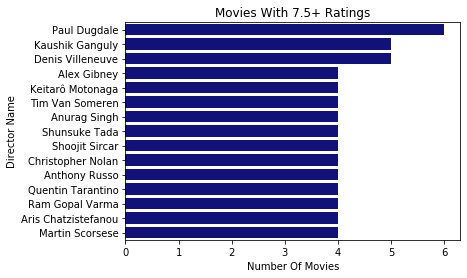

In [202]:
chart1index = list(chart1data4.index)
chart1values = list(chart1data4)
chart1 = sns.barplot(x=chart1values, 
                     y=chart1index,
                     color='darkblue')
chart1.set(ylabel='Director Name', xlabel='Number Of Movies')
chart1.set_title('Movies With 7.5+ Ratings')

In [5]:
imdb_principles = pd.read_sql_query("""
SELECT * 
FROM movies.imdb_title_principals
LIMIT 1000;
""",con)

In [6]:
imdb_principles.columns

Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object')

In [7]:
imdb_principles.head(30)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,,"[""The Man""]"
1,tt0111414,2,nm0398271,director,,
2,tt0111414,3,nm3739909,producer,producer,
3,tt0323808,10,nm0059247,editor,,
4,tt0323808,1,nm3579312,actress,,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,,
9,tt0323808,6,nm0811056,producer,producer,


In [148]:
imdb_principles.pivot_table(index=imdb_principles['tconst'],columns='category')

ordering                                                     \
category     actor   actress archive_footage cinematographer composer   
tconst                                                                  
tt0111414      1.0       NaN             NaN             NaN      NaN   
tt0323808      2.5  2.500000             NaN             9.0      8.0   
tt0417610      2.0  3.000000             NaN             NaN     10.0   
tt0469152      3.5  1.500000             NaN             9.0      8.0   
tt0473032      1.5       NaN             NaN             NaN      NaN   
...            ...       ...             ...             ...      ...   
tt1294688      3.0  2.000000             NaN             9.0      8.0   
tt1298644      3.5  1.500000             NaN             NaN      NaN   
tt1300159      3.0  2.000000             NaN             NaN      NaN   
tt1308748      2.0  2.666667             NaN             7.0      6.0   
tt1308754      2.0  2.000000             NaN             NaN      NaN   

                                                                    
category  director editor producer production_designer self writer  
tconst                                                              
tt0111414      2.0    NaN      3.0                 NaN  NaN    NaN  
tt0323808      5.0   10.0      6.5                 NaN  NaN    NaN  
tt0417610      5.0    NaN      8.0                 NaN  NaN    6.0  
tt0469152      5.0   10.0      7.0                 NaN  NaN    6.0  
tt0473032      3.0    NaN      NaN                 NaN  NaN    NaN  
...            ...    ...      ...                 ...  ...    ...  
tt1294688      5.0   10.0      6.5                 NaN  NaN    NaN  
tt1298644      5.0    NaN     10.0                 NaN  NaN    7.5  
tt1300159      5.0    NaN     10.0                 NaN  NaN    7.5  
tt1308748      5.0    NaN      NaN                 NaN  NaN    NaN  
tt1308754      NaN    NaN      NaN                10.0  NaN    NaN  

[142 rows x 11 columns]